In [182]:
import pandas as pd
pd.options.display.max_columns = 100
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
#pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis

#import re
#from os import path
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 

In [276]:
df = pd.read_csv('base_limpia.csv')
df.head()

,date,tweet,sentiment
0,2021-03-02,"Hola Carlos, ¿realizaste algún bloqueo de tus ...",9.306416e-03
1,2021-03-02,cerró las cuentas,4.737107e-01
2,2021-03-02,"Así es, los demás no la hacen nada de mal........",7.706142e-06
3,2021-03-02,estaría weno,4.978923e-01
4,2021-03-02,"Otro más, favor a mis seguidoras(es) denunciar...",2.214514e-07


In [277]:
# quitamos mayúsculas
df["tweet"] = df["tweet"].str.lower()

In [255]:
#nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

In [256]:
stop_words.update(['banco','bancoestado','estado','(',')',' " ','q','chile','ahora','si'])

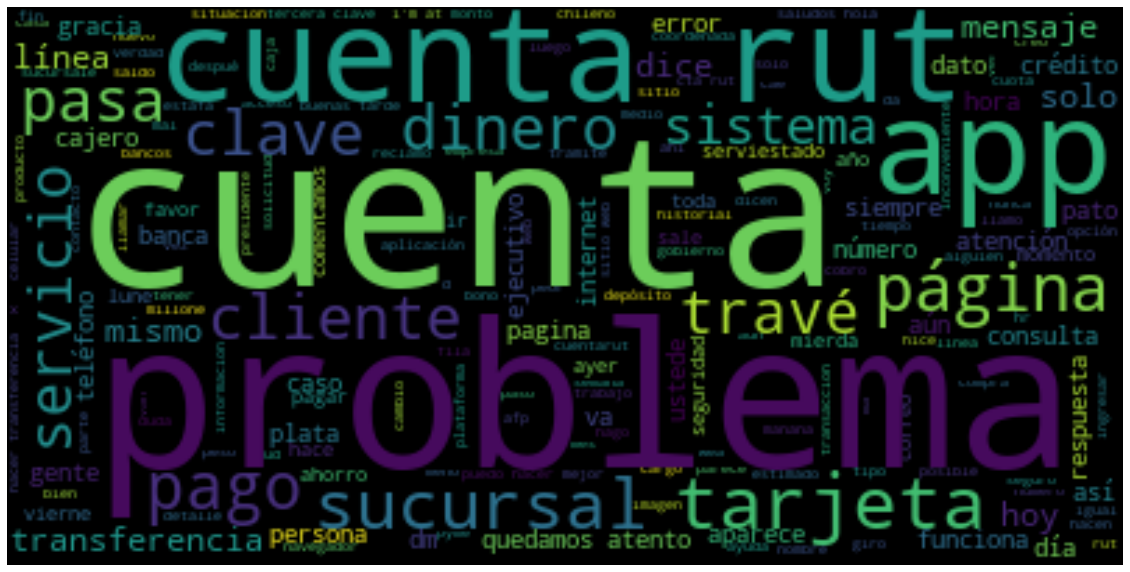

In [257]:
textt = ' '.join( [twts for twts in df['tweet']])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Tomando la serie diaria, vemos cuales son las palábras más repetidas en los días de "máxima queja"

Primero, identificamos los días como mayores alzas en volumen de  tweets
Para esto, generamos una base estructurada por día, y colapsamos todos los tweets en una línea de texto para el día.

DataFrame: [fecha, volumen, texto, sentimiento]

In [281]:
data = df.loc[::-1].reset_index(drop = True)
data.head()

,date,tweet,sentiment
0,2010-01-01,"comienzo 2010 feliz x mi familia, gratitud ban...",0.713020
1,2010-01-04,comerciantes ambulantes hacen caso omiso y sig...,0.121589
2,2010-01-04,"la página del banco estado es un asco, solo re...",0.143255
3,2010-01-04,shuuuu!!! sorry pido disculpas a nombre de ban...,0.000026
4,2010-01-04,oiga... sres banco estado su pagina web es pes...,0.134938


In [283]:
data.groupby("date").size().values

array([  1,   8,  11, ..., 242, 577, 551], dtype=int64)

In [284]:
fechas = data['date'].unique() # recorridas en sentido contrario a volumen!
volumen = data.groupby("date").size().values

In [285]:
data = pd.DataFrame({'date': fechas, 'volumen':volumen})
data.head()

,date,volumen
0,2010-01-01,1
1,2010-01-04,8
2,2010-01-05,11
3,2010-01-06,8
4,2010-01-07,5


In [286]:
data['text'] = ''
for i in range(fechas.size):
    aux = df[df['date'] == fechas[i]]['tweet']
    data['text'][i] = ' '.join( [twts for twts in aux])

<ipython-input-286-1dc77c2142ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = ' '.join( [twts for twts in aux])


In [287]:
data.head()

,date,volumen,text
0,2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban..."
1,2010-01-04,8,no me funciona la clave del banco estado :( rt...
2,2010-01-05,11,"y hay otros peores, es cosa de husmear en la b..."
3,2010-01-06,8,un redbank de banco estado? banco estado de ra...
4,2010-01-07,5,así con el lanzamiento en el centro de eventos...


In [288]:
# tokenize  text 
data['clean_txt'] = ''
for i in range(fechas.size): 
    text = data['text'][i]
    clean = [word for word in text.split() if word not in stop_words]
    clean_text = ' '.join(clean)
    data['clean_txt'][i] = clean_text

<ipython-input-288-083638ec2ff9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_txt'][i] = clean_text


In [289]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
data['sentiment'] = data.apply(lambda row : sentiment.sentiment(row['clean_txt']), axis = 1) 
data['sentiment_raw'] = data.apply(lambda row : sentiment.sentiment(row['text']), axis = 1)

In [290]:
data

,date,volumen,text,clean_txt,sentiment,sentiment_raw
0,2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...","comienzo 2010 feliz x familia, gratitud cestas...",8.702934e-01,7.130203e-01
1,2010-01-04,8,no me funciona la clave del banco estado :( rt...,funciona clave :( rt: : firefox llevan bien?||...,1.676092e-05,4.136488e-16
2,2010-01-05,11,"y hay otros peores, es cosa de husmear en la b...","peores, cosa husmear bd bancoestado.. esperand...",2.538503e-09,3.795512e-18
3,2010-01-06,8,un redbank de banco estado? banco estado de ra...,redbank estado? rancagua independencia llamaba...,6.245535e-07,5.661271e-19
4,2010-01-07,5,así con el lanzamiento en el centro de eventos...,así lanzamiento centro eventos estado... puro ...,7.385619e-02,3.181030e-01
...,...,...,...,...,...,...
4067,2021-02-26,507,banco estado dando la nota otra vez. no hay tr...,dando nota vez. transacciones. pésimo. ser cré...,0.000000e+00,0.000000e+00
4068,2021-02-27,293,banco estado los domingo no atiende cierto? bu...,domingo atiende cierto? busque pagina santande...,0.000000e+00,0.000000e+00
4069,2021-02-28,242,arreglen su mierda de página para pagar su put...,arreglen mierda página pagar puto cae! 4 meses...,1.119207e-319,0.000000e+00
4070,2021-03-01,577,"¡qué onda con banco estado!, que tiene la banc...","¡qué onda estado!, banca línea caída mes... po...",0.000000e+00,0.000000e+00


In [293]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...","comienzo 2010 feliz x familia, gratitud cestas...",8.702934e-01,7.130203e-01
2010-01-04,8,no me funciona la clave del banco estado :( rt...,funciona clave :( rt: : firefox llevan bien?||...,1.676092e-05,4.136488e-16
2010-01-05,11,"y hay otros peores, es cosa de husmear en la b...","peores, cosa husmear bd bancoestado.. esperand...",2.538503e-09,3.795512e-18
2010-01-06,8,un redbank de banco estado? banco estado de ra...,redbank estado? rancagua independencia llamaba...,6.245535e-07,5.661271e-19
2010-01-07,5,así con el lanzamiento en el centro de eventos...,así lanzamiento centro eventos estado... puro ...,7.385619e-02,3.181030e-01
...,...,...,...,...,...
2021-02-26,507,banco estado dando la nota otra vez. no hay tr...,dando nota vez. transacciones. pésimo. ser cré...,0.000000e+00,0.000000e+00
2021-02-27,293,banco estado los domingo no atiende cierto? bu...,domingo atiende cierto? busque pagina santande...,0.000000e+00,0.000000e+00
2021-02-28,242,arreglen su mierda de página para pagar su put...,arreglen mierda página pagar puto cae! 4 meses...,1.119207e-319,0.000000e+00


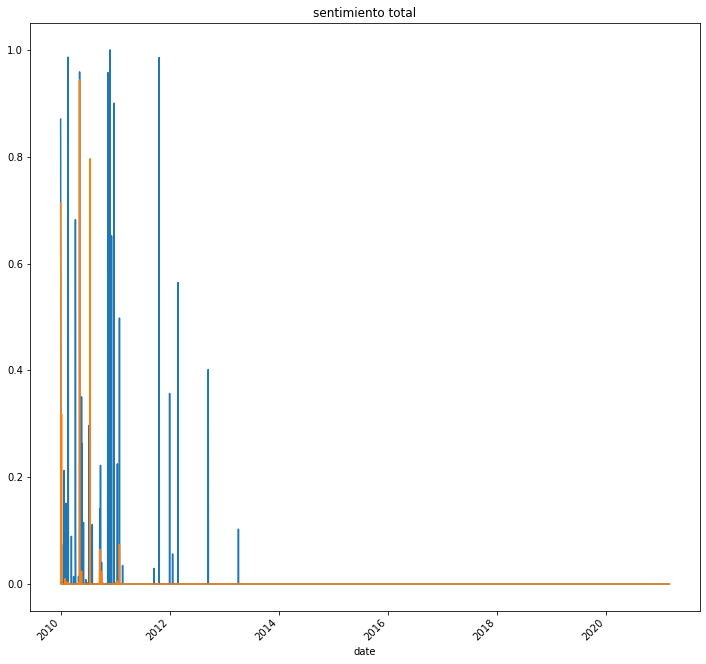

In [295]:
plt.figure(figsize=(12, 12))
ax = data['sentiment'].plot()
ax2 = data['sentiment_raw'].plot()
#ax.xaxis.set_major_locator(md.YearLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
ax.set_title('sentimiento total')
plt.show()

In [330]:
data[data["sentiment"] >= 0.4]

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-01,1,"comienzo 2010 feliz x mi familia, gratitud ban...","comienzo 2010 feliz x familia, gratitud cestas...",0.870293,7.130203e-01
2010-02-21,4,aunque no lo crean las piernas de la tonka en ...,aunque crean piernas tonka comercial reemplaza...,0.986403,3.295424e-03
2010-04-10,6,"7:40 en la casa central del banco estado, alam...","7:40 casa central estado, alameda bandera. ent...",0.681988,1.245713e-04
2010-05-08,1,entrenando para el partido de las 4 (@ centro ...,entrenando partido 4 (@ centro deportivo banco...,0.958655,9.437378e-01
2010-11-13,10,con la instalación de bancoestado micro empres...,"instalación micro empresa, sucursal porvenir c...",0.957651,1.629966e-06
2010-11-28,13,milagro ! pude hacer una transferencia desde f...,milagro ! pude hacer transferencia firefox/lin...,0.999934,1.101298e-05
2010-12-08,16,: ya estoy decorando la casa del pato de banco...,": decorando casa pato bancoestado, participa a...",0.651812,3.017732e-13
2010-12-25,4,"feliz, porque la sole se ganó un ipod touch e...","feliz, sole ganó ipod touch concurso ""phishing...",0.900116,4.060883e-04
2011-01-30,1,me llego un mail de banco estado solicitando m...,llego mail solicitando coordenadas transferenc...,0.497892,7.394791e-02


In [307]:
data.loc['2010-01-01']['text']

'comienzo 2010 feliz x mi familia, gratitud bancoestado cestas octantis; esperanza x chile y entusiasmado x nuevo equipo y desafío innovación'

In [308]:
data.loc['2011-10-23']['text']

'son esas canciones de moda... como en paris...banco estado... : recién vi el comercial de buddy richard para bancoestado. alguien cachó que los mecánicos son copias de ?/ q buen dato muy buena publicidad de banco estado.... lo unico bueno q tiene bancoestado son los comerciales pato mentiroso tramitadores como ellos no hay chileseaburrio tu presupuesto se te va!!!! jajaja es canta, junto con el pato de bancoestado!! cómo es q buddy richard acepta participar en el comercial de banco estado "tu platita se t va" atroz primero chancho en piedra y ahora buddy richard, apuesto q bancoestado les da tasa de 0,2% conchetumadre...buddy richard en un comercial de bancoestado. tu argumento es inválido. buddy richard es nuestro puma rodríguez. bancoestado eclipse y cuando todos creíamos q buddy richard no sería vigente, el pato de banco estado lo revive del inframundo. qué-chucha con buddy richard en un comercial de banco estado o_o bueno el reclame del banco estado que es chistoso ver a buddy ric

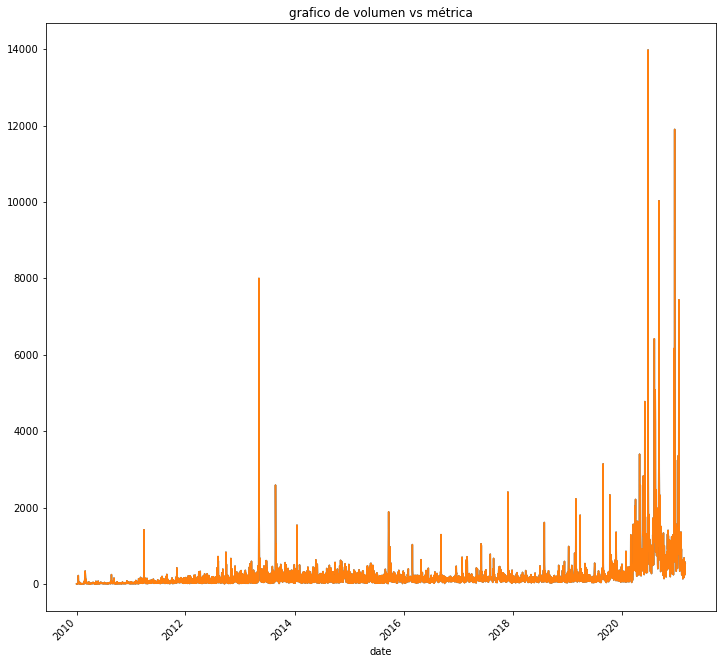

In [313]:
plt.figure(figsize=(12, 12))

(data['volumen']*(1-data['sentiment_raw'])).plot()
ax = data['volumen'].plot()


ax.set_title('grafico de volumen vs métrica')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

Identificando los peaks de tweets, vemos las palabras más repetidas en tales ocaciones

In [318]:
data[data["volumen"] >= 1400]

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2011-03-29,1422,si bancoestado es del estado no debe aplicarse...,debe aplicarse ley transparencia? 15 días info...,0.0,0.0
2013-05-06,1646,"jaime estévez en el 2000, mientras ocupaba el...","jaime estévez 2000, mientras ocupaba cargo pre...",0.0,0.0
2013-05-07,8003,"ese niño ossa parece tontito, frente preguntas...","niño ossa parece tontito, frente preguntas llo...",0.0,0.0
2013-05-08,2840,ahora pato burlon y estafador del bancoestado ...,pato burlon estafador parrilla bachelet abusos...,0.0,0.0
2013-05-09,1699,"mencioneunladrón uno ?? farmacias, cencosud, b...","mencioneunladrón ?? farmacias, cencosud, banco...",0.0,0.0
...,...,...,...,...,...
2021-01-05,1477,"que paso ahora??? yo no fui, fueron los reales...","paso ahora??? fui, reales 🤣 disponible opción ...",0.0,0.0
2021-01-14,1706,cuánto tiempo van a dar para renovar la tarjet...,cuánto tiempo van dar renovar tarjeta?en conce...,0.0,0.0
2021-01-15,3363,sacos de h.... en el peor momento de la pandem...,sacos h.... peor momento pandemia reconoce reb...,0.0,0.0


In [327]:
 # se tienen 89 ocaciones donde se supera el umbral de los 1400 tweets
spikes = data[data["volumen"] >= 1400]   
#pd.set_option('display.max_rows', spikes.shape[0]+1)
#print(spikes)
#spikes.loc['2011-03-29']['text']

In [335]:
# estudiaremos la fecha del 2011-03-29, 
#para hackeo de banco estado: 2020-09-07:vemos desde 2020-08-31, 2020-09-05, 2020-09-06 y 2020-09-07 
texto1 = spikes.loc['2011-03-29']['clean_txt']
hack01 = spikes.loc['2020-08-31']['clean_txt']
hack02 = spikes.loc['2020-09-05']['clean_txt']
hack03 = spikes.loc['2020-09-06']['clean_txt']
hack = spikes.loc['2020-09-07']['clean_txt']

In [336]:
######### 2011-03-29  #########
tokens = nltk.word_tokenize(texto1)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 672), (',', 618), ('estonotienenombre', 438), ('.', 387), ('?', 372), ('...', 271), ('pato', 265), ('estado', 219), ('entn', 181), ('bancoestado', 166), (':', 146), ('``', 111), ("''", 100), ('ejecutivo', 72), ('chilenos', 71), ('gente', 70), ('tvn', 61), ('nombre', 60), ('clientes', 60), ('seguros', 56), ('mas', 56), ('..', 52), ('hoy', 51), ('(', 49), ('patito', 47), ('cara', 45), ('ejecutivos', 45), ('mal', 40), ('....', 39), (')', 37)]


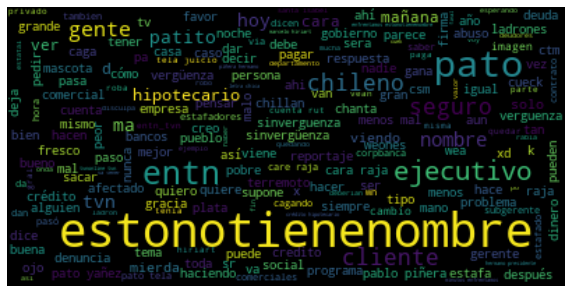

In [342]:
wordcloud = WordCloud(stopwords=stop_words).generate(texto1)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [337]:
######### 2020-08-31  #########
tokens = nltk.word_tokenize(hack01)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[(',', 1470), ('.', 940), ('!', 642), ('?', 634), ('hola', 281), ('cuenta', 255), ('puedo', 145), ('mensaje', 132), ('hacer', 121), ('...', 112), ('rut', 109), ('necesito', 108), ('pago', 99), ('dm', 97), ('¡saludos', 90), ('pagar', 87), ('error', 85), ('bancoestado', 83), ('tarjeta', 82), ('turismo', 78), ('mismo', 78), ('transferir', 77), ('fogape', 75), ('estado', 74), ('dice', 73), ('atención', 71), ('app', 69), ('comprar', 68), ('(', 67), ('dinero', 67)]


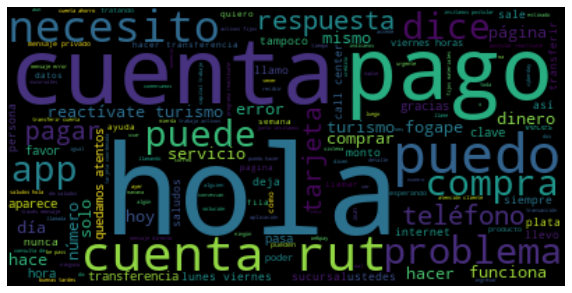

In [343]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack01)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [339]:
######### 2020-09-05  #########
tokens = nltk.word_tokenize(hack02)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[(',', 1641), ('.', 1116), ('!', 911), ('?', 911), ('hola', 292), ('hacer', 279), ('puedo', 269), ('página', 237), ('transferir', 235), ('app', 226), ('...', 222), ('problema', 215), ('pasa', 180), ('pagar', 173), ('transferencias', 164), ('error', 155), ('problemas', 154), ('puede', 150), ('mismo', 142), ('realizar', 142), ('atentos', 135), ('transferencia', 127), ('día', 124), ('cuenta', 122), ('deja', 106), ('dm', 105), ('pagina', 104), ('historial', 98), ('tarjeta', 97), ('funciona', 95)]


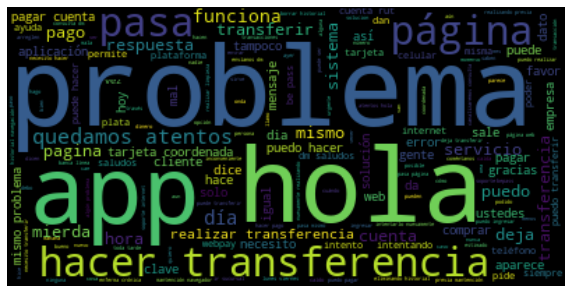

In [344]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack02)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [340]:
######### 2020-09-06  #########
tokens = nltk.word_tokenize(hack03)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[(',', 2407), ('.', 1824), ('!', 1499), ('?', 1226), ('...', 455), ('página', 406), ('ayer', 358), ('pagar', 352), ('app', 325), ('hacer', 321), ('problemas', 286), ('puedo', 285), ('cuenta', 243), ('error', 214), ('web', 213), ('problema', 212), ('hola', 212), ('puede', 207), ('pasa', 191), ('funciona', 182), ('pagina', 173), ('estado', 166), ('servicio', 161), ('mismo', 147), ('días', 144), ('hace', 140), ('realizar', 138), ('cuentas', 130), ('transferir', 129), ('día', 126)]


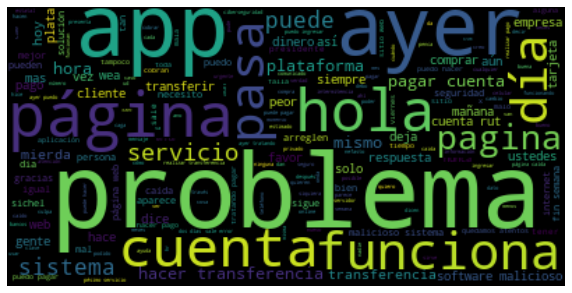

In [345]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack03)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [341]:
######### 2020-09-07  #########
tokens = nltk.word_tokenize(hack)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[(',', 7107), ('.', 5688), ('?', 3209), ('!', 3001), ('...', 1255), ('estado', 1044), (':', 725), ('cuenta', 654), ('``', 650), ('sucursales', 645), ("''", 618), ('hacer', 590), ('app', 531), ('sichel', 512), ('hoy', 497), ('pagar', 492), ('página', 484), ('ataque', 463), ('web', 461), ('hola', 435), ('software', 418), ('funciona', 414), ('malicioso', 398), ('problemas', 390), ('puede', 387), ('..', 374), ('hace', 367), ('seguridad', 361), ('bancoestado', 360), ('(', 354)]


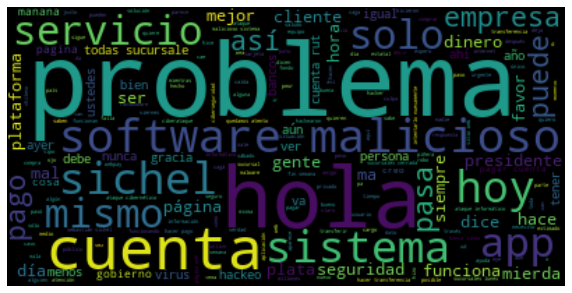

In [346]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()